In [1]:
import matplotlib
import matplotlib.pyplot
import matplotlib.style
import numpy
import sympy
import sympy.printing
import sympy.utilities

matplotlib.rcParams["figure.figsize"] = [12, 6]
matplotlib.style.use("dark_background")
sympy.init_printing(use_latex=True)

In [2]:
# we introduce variables to simplify the equations
# normalised pixel position 'p = x / w'
# normalised shear 's = delta * v / w'
# count 'c = delta * rho'
# the condition 'delta * v < w' becomes 's < 1'

# c, p in ]0, +oo[
c, p = sympy.symbols("c p", real=True, positive=True)

# s in ]0, 1[
s0 = sympy.symbols("s0", real=True, positive=True)
s1 = s0 + 1
s = 1 / s1

f = sympy.Piecewise(
    (0, p < 0),
    (p * c / s, p < s),
    (c, p < 1),
    (c * (1 - (p - 1) / s), p < 1 + s),
    (0, True),
)

mu_with_assumptions = sympy.integrate((f / (1 + s)).simplify(), (p, 0, 1 + s)).simplify()
variance_with_assumptions = sympy.integrate(
    (((f - mu_with_assumptions) ** 2) / (1 + s)).simplify(), (p, 0, 1 + s)
).simplify()


In [3]:
# re-introduce variables to clear bindings
s0, s1, s = sympy.symbols("s0 s1 s", real=True, positive=True)

mu = mu_with_assumptions.subs(s0, 1 / s - 1).simplify()
variance = variance_with_assumptions.subs(s0, 1 / s - 1).simplify().factor()

\frac{c}{s + 1}


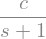

In [4]:
print(sympy.printing.latex(mu))
mu

- \frac{c^{2} s \left(s - 2\right)}{3 \left(s + 1\right)^{2}}


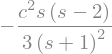

In [5]:
print(sympy.printing.latex(variance))
variance

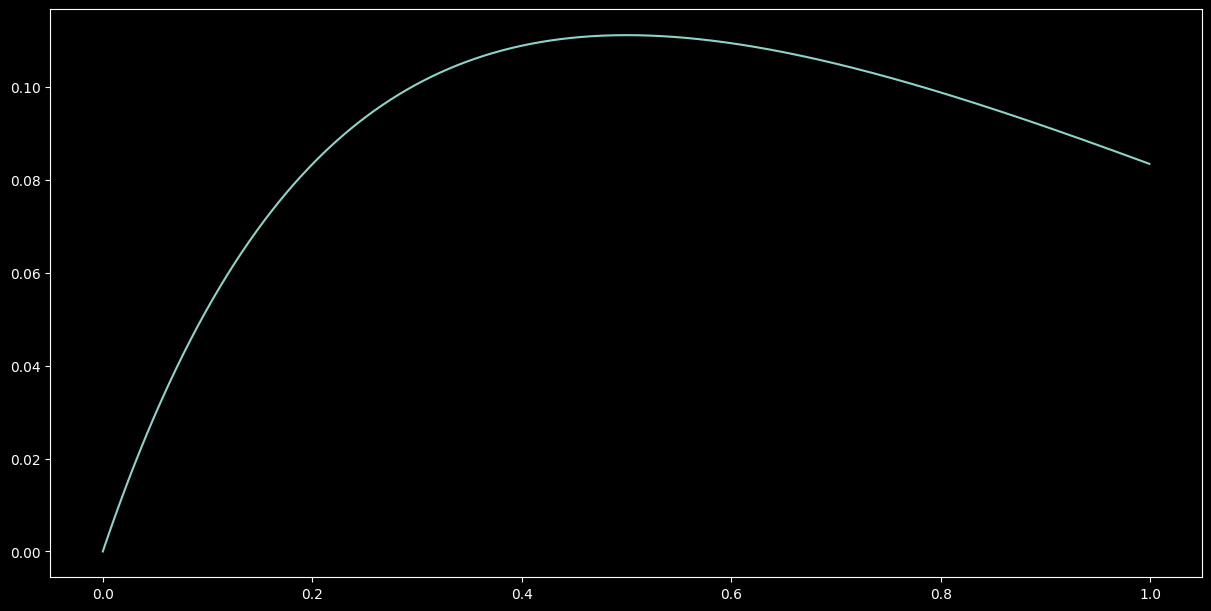

In [6]:
variance_lambda = sympy.utilities.lambdify(s, variance.subs(c, 1.0))

s_grid = numpy.linspace(0.0, 1.0, 1000, endpoint=False)

figure, subplot = matplotlib.pyplot.subplots(layout="constrained")
subplot.plot(
    s_grid,
    numpy.vectorize(variance_lambda)(s_grid),
)